<a href="https://colab.research.google.com/github/danon6868/blastim-ml/blob/main/statistics_day_9/class_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# Pandas понадобится нам для чтения денных
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Данные можно скачать по [ссылке](https://drive.google.com/file/d/1j-NEMWgFI4zh9ebVi6r657CjbrPA6gk7/view?usp=drive_link).

In [23]:
# В переменную data_path надо положить путь до данных
data_path = "/home/sergei/Документы/immune_cells_data.csv"
expression_data = pd.read_csv(f"{data_path}", index_col=0)
expression_data.head()

,TMCC1,RANBP3,GABRG3,ARRDC5,LRP3,TIMM23,TBPL1,BIRC8,TTC28,C19orf66,...,MAGEA6,IL4I1,LCN12,SMG6,C1orf100,WDR75,ZBTB26,SPTY2D1,PLEKHA2,Cell_type
0,33.888550,38.384340,0.044721,1.385159,11.341853,105.193306,26.463990,0.000000,1.537873,27.645407,...,21.332443,1.397932,0.000000,23.136585,0.001902,60.218548,6.307399,9.577274,44.026940,B_cell
1,16.497124,35.054090,0.314645,4.329797,8.649321,50.577618,16.684614,0.000000,1.796609,13.715611,...,1.199440,159.147130,0.259244,18.986986,0.310971,25.818224,4.193348,14.181196,35.779896,B_cell
2,5.449933,31.783958,0.002949,2.137536,1.750892,109.201050,35.265984,0.011501,0.878889,19.361662,...,0.002924,25.256378,0.000000,32.941895,0.000000,99.555990,8.323141,29.321960,30.816538,B_cell
3,33.362240,56.147026,0.037295,1.604904,6.807299,100.141620,25.446817,0.000000,2.502661,12.745437,...,0.000000,14.509516,0.063003,19.036896,0.000000,49.394980,4.655794,17.683067,47.143270,B_cell
4,50.188510,30.165264,0.039678,1.501439,1.619954,46.916790,28.053373,0.018181,1.165164,30.318027,...,0.033807,93.681190,0.031816,19.094831,0.000000,20.201437,6.935232,20.769829,53.935143,B_cell


In [24]:
b_cells_expression_data = expression_data.query("Cell_type == 'B_cell'")
nk_cells_expression_data = expression_data.query("Cell_type == 'NK_cell'")

В этом задании мы будем работать с данными об экспрессии генов в друх клеточных типах: в B-клетках и в NK-клетках. Выясним, средняя экспрессия каких генов значимо различается в этих клеточных типах.

Я буду показывать примеры на одном гене, а на основе них вы сможете сделать похожие задачи для всех генов.

In [25]:
example_gene = "TMCC1"

## Задание 1

**2 баллов**

Посмотрим на распределение экспрессий гена `TMCC1` в обоих клеточных типах.

/home/sergei/miniconda3/envs/blast_env/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


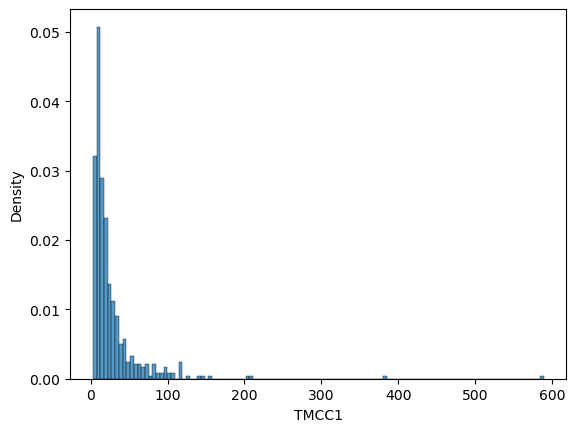

In [26]:
sns.histplot(b_cells_expression_data[example_gene], stat="density");

/home/sergei/miniconda3/envs/blast_env/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


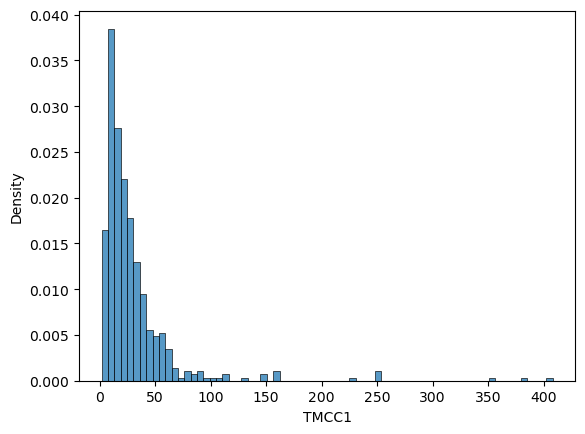

In [27]:
sns.histplot(nk_cells_expression_data[example_gene], stat="density");

In [28]:
nk_cells_expression_data[example_gene].describe()

count    500.000000
mean      30.431320
std       40.803503
min        1.893709
25%       11.417924
50%       19.990164
75%       34.193337
max      408.149440
Name: TMCC1, dtype: float64

In [29]:
b_cells_expression_data[example_gene].describe()

count    500.000000
mean      26.978972
std       40.501733
min        2.612815
25%        9.042402
50%       15.629542
75%       28.443489
max      589.438350
Name: TMCC1, dtype: float64

Кажется, что они немного различаются. Для начала давайте попробуем еще раз проверить центральную предельную теорему.

**Задание:**

Напишите функцию, которая будет принимать на вход экспрессии гена, семплировать их них выборки размера `sample_size`, считать среднюю экспрессию и повторять это `n_samples` раз. Примените эту функцию к экспрессиям гена `TMCC1` в обоих клеточных типах, визуализируйте их. Отличаются ли средние экспрессии данного гена у этих клеточных типов?

Сигнатура функции:

```python
def demonstrate_clt(expressions, sample_size, n_samples):
    mean_expressions = []

    return mean_expressions
```

In [30]:
def demonstrate_clt(expressions, sample_size, n_samples):
    mean_expressions = []
    for i in range(n_samples):
        sample = np.random.choice(expressions, sample_size)
        mean = sample.mean()
        mean_expressions.append(mean)
    return np.array(mean_expressions)
    

/home/sergei/miniconda3/envs/blast_env/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


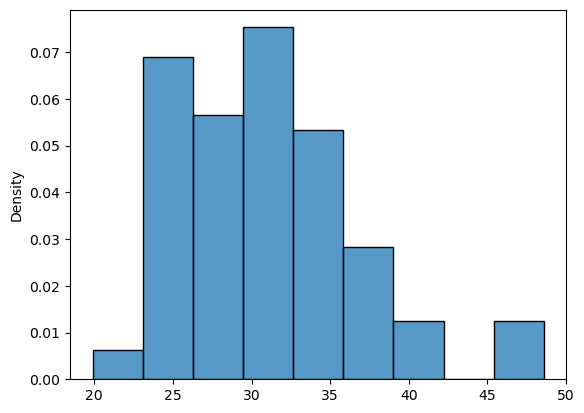

In [31]:
nk_cells_means = demonstrate_clt(nk_cells_expression_data[example_gene], sample_size=50, n_samples=100)
sns.histplot(nk_cells_means, stat='density')
nk_mean = nk_cells_means.mean()
nk_sample_size = len(nk_cells_means)
nk_se = nk_cells_means.std()/np.sqrt(nk_sample_size)
left_nk = nk_mean - 1.96*nk_se
right_nk = nk_mean + 1.96*nk_se

/home/sergei/miniconda3/envs/blast_env/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


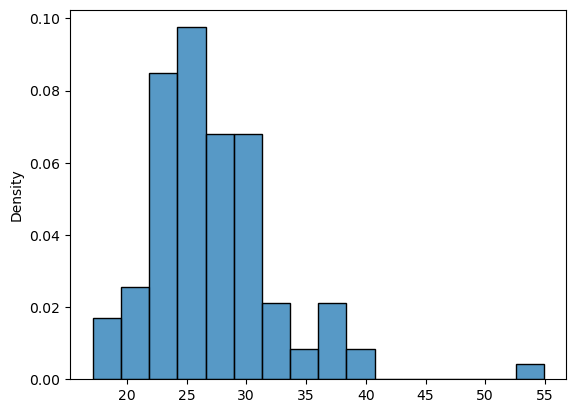

In [32]:
b_cells_means = demonstrate_clt(b_cells_expression_data[example_gene], sample_size=50, n_samples=100)
sns.histplot(b_cells_means, stat='density')
b_mean = b_cells_means.mean()
b_sample_size = len(b_cells_means)
b_se = b_cells_means.std()/np.sqrt(b_sample_size)
left_b = b_mean - 1.96*b_se
right_b = b_mean + 1.96*b_se

А теперь посчитайте 95% доверительные интервалы для обоих распределений (примем тот факт, что средние распределены нормально для обоих клеточных типов) и скажите, отличается ли средняя экспрессия данного гена между клеточными типами?

In [33]:
[left_b, right_b, b_mean]

[26.1574094363489, 28.27074549085109, 27.214077463599995]

In [34]:
[left_nk, right_nk, nk_mean]

[30.045815001268913, 32.24553765993109, 31.1456763306]

In [35]:
#Выборки отличаются, доверительные интервалы не перекрываются

## Задание 2

**4 баллов**

Вспомнили центральную предельную теорему и то, как считать доверительные интервалы в простом случае, теперь давайте воспользуемся библиотечной реализацией для того, чтобы протестировать уже все гены.

In [36]:
import scipy.stats as st

Посчитаем доверительные интервалы для нашего демонстрационного гена в обоих клеточных типах:

In [37]:
# B клетки
b_interval = st.t.interval(confidence=0.95, # 95% доверительный интервал
              df=len(b_cells_expression_data[example_gene]) - 1, # число степеней свободы - 1
              loc=np.mean(b_cells_expression_data[example_gene]), # Среднее
              scale=st.sem(b_cells_expression_data[example_gene])) # Стандартная ошибка среднего
b_interval

(23.420272072079296, 30.53767158632071)

In [38]:
# NK клетки
nk_interval = st.t.interval(confidence=0.95, # 95% доверительный интервал
              df=len(nk_cells_expression_data[example_gene]) - 1, # число степеней свободы - 1
              loc=np.mean(nk_cells_expression_data[example_gene]), # Среднее
              scale=st.sem(nk_cells_expression_data[example_gene])) # Стандартная ошибка среднего
nk_interval

(26.84610468807562, 34.01653451272438)

In [39]:
def are_intersect(first_ci, second_ci):
    first_min, first_max = first_ci
    second_min, second_max = second_ci
    if max(first_min, second_min) >= min(first_max, second_max):
        return True
    else:return False


def get_intervals(first_data, second_data):
    first_interval = st.t.interval(confidence=0.95, df=len(first_data) - 1,
              loc=np.mean(first_data),
              scale=st.sem(first_data))
    second_interval = st.t.interval(confidence=0.95, df=len(second_data) - 1,
              loc=np.mean(second_data),
              scale=st.sem(second_data))
    return (first_interval[0],
            first_interval[1],
            second_interval[0],         
            second_interval[1])

# функция для всей таблицы
def intervals_are_intersect(max_min):
    first_min, first_max, second_min, second_max = max_min
    minimums = np.maximum(first_min, second_min)
    maximus = np.minimum(first_max, second_max)
    return minimums >= maximus

In [40]:
are_intersect(b_interval, nk_interval)

False

Напишите функцию для проверки того, что доверительные интервалы пересекаются. На лекции мы тестировали гипотезы для равенства среднего выборки заданному числу и проверяли, попало ли оно в границы этого интервала или нет, если оно оказывалось за ними, то мы говорили, что средние отличаются. Здесь же мы имеем дело с двумя выборками, поэтому будем проверять, пересекаются ли доверительные интервалы, и, если нет, то говорить о том, что средние в выборках отличаются.

```python
def check_intervals_intersect(first_ci, second_ci):   

    return are_intersect # True or False
```

Теперь для каждого гена посчитайте доверительные интервалы в обоих клеточных типах, и проверьте, пересекаются ли они? Результаты можно добавлять в список, например:

```python
ci_test_results = [True, False, ..., True]
```

In [41]:
b_c = expression_data.query("Cell_type == 'B_cell'").drop("Cell_type", axis=1)
nk_c = expression_data.query("Cell_type == 'NK_cell'").drop("Cell_type", axis=1)

intervals = get_intervals(b_c, nk_c)
intervals_are_intersect(intervals)

array([False, False, False, ..., False, False, False])

Попытайтесь оформить это в виде функции, которая будет принимать на вход две таблицы с экспрессиями и выдавать для каждого гена, значимо ли отличается его средняя экспрессия между клеточными типами.

```python
def check_dge_with_ci(first_table, second_table):
    # dge - differential gene expression

    return ci_test_results
```

In [42]:
from scipy.stats import ttest_ind

In [57]:
def check_dge_with_ci(first_table, second_table):
    alpha=0.05
    _, p_values_ttest = ttest_ind(first_table, second_table)
    return (p_values_ttest < alpha)


ci_test_result = check_dge_with_ci(b_c, nk_c)
ci_test_result

array([False,  True, False, ..., False, False,  True])

## Задание 3

**4 баллов**

Давайте теперь применим для той же задачи `z-критерий`. Будем считать, что в данном случае $\alpha$ = 0.05, и если полученное `p-value` будет меньше, то экспрессия генов значимо отличается.

In [44]:
from statsmodels.stats.weightstats import ztest

In [45]:
# Наш излюбленный ген
ztest(
    b_cells_expression_data[example_gene],
    nk_cells_expression_data[example_gene]
)

(-1.3427434041885127, 0.17935507499860204)

In [58]:
def check_dge_with_ztest(first_table, second_table):
    alpha=0.05
    _, p_values_ztest = ztest(first_table, second_table)
    return (p_values_ztest < alpha)


z_test_result = check_dge_with_ci(b_c, nk_c)
z_test_result

array([False,  True, False, ..., False, False,  True])

Попытайтесь оформить это в виде функции, которая будет принимать на вход две таблицы с экспрессиями и выдавать для каждого гена, значимо ли отличается его средняя экспрессия между клеточными типами.

```python
def check_dge_with_ztest(first_table, second_table):
    # dge - differential gene expression

    return z_test_results
```

## Задание 4

**10 баллов**

Теперь пришла пора оформить все ваши старания в виде программы. Напишите программу (можно просто функцию), которая принимает на вход следующие аргуметры:

1. `first_cell_type_expressions` &ndash; таблица с экспрессиями генов для одного клеточного типа;
2. `second_cell_type_expressions` &ndash; таблица с экспрессиями генов для второго клеточного типа;

Как читать данные при помощи пандаса мы уже знаем, осталось понять, как записывать результаты. Допустим, вы записывали результаты ваших тестов в списки, тогда создать пандасовский датафрейм можно следующим образом:

In [46]:
ci_test_results = [True, False, True]
z_test_results = [True, True, True]
# Опционально можно также сохранять p-value для z-критерия
z_test_p_values = [0.004, 0.01, 0.0001]
# Также сохраните разницу в средних экспрессиях между 1 и 2 таблицами для каждого гена,
# чтобы было понять, уменьшается или увеличивается экспрессия гена
mean_diff = [-10, 10, 0.5]

# Созданим словарь {'название колонки': список_значений}
results = {
    "ci_test_results": ci_test_results,
    "z_test_results": z_test_results,
    "z_test_p_values": z_test_p_values,
    "mean_diff": mean_diff
}

# Из словаря делаем датафрейм
results = pd.DataFrame(results)
results.head()

,ci_test_results,z_test_results,z_test_p_values,mean_diff
0,True,True,0.0040,-10.0
1,False,True,0.0100,10.0
2,True,True,0.0001,0.5


In [47]:
# Сохраним таблицу в .csv файл
results.to_csv("path_to_your_awesome_results.csv")

In [78]:
def check_tables(first_table, second_table):
    alpha=0.05
    _, p_values_ttest = ttest_ind(first_table, second_table)
    _, p_values_ztest = ztest(first_table, second_table)
    first_table.mean
    results = {
    "ci_test_results": (p_values_ttest < alpha),
    "z_test_results": (p_values_ztest < alpha),
    "z_test_p_values": p_values_ztest,
    "t_test_p_values": p_values_ttest,
    "mean_diff": abs(first_table.mean() - second_table.mean())
    }
    return pd.DataFrame(results)

In [79]:
first = nk_cells_expression_data[example_gene]
second = b_cells_expression_data[example_gene]
frame = check_tables(b_c, nk_c)
frame.head()
frame.to_csv("домашнее задание по статистике.csv")

## Задание 5

**0.5 баллов (доп.)**

Напишите сюда фидбек о самостоятельном задании. Что (не-)понравилось, что показалось слишком простым/сложным.

* ...

In [ ]:
# не совсем понятно была связь нахождения интервалов в задании 2. В одном случае мы просто констатируем, что отличия есть; в другом - насколько они приемлемы?